# ***Laboratório 3 - Captura de Imagem e Vídeo***

## **Integrantes:**
- Matheus Foresto Moselli
- Marcos Vinicius Medeiros da Silva
- Karl Eloy Marques Henrique

**Data do experimento:** 20/02/2026 <br/>
**Data de publicação do relatório:** 27/02/2026

## Introdução
Este relatório documenta os resultados das atividades realizadas Laboratório 3 da disciplina Processamento Digital de Imagens, focado na manipulação de entradas e saídas de imagem e vídeo usando Python e OpenCV. O experimento teve por objetivo explorar conceitos fundamentais como leitura, exibição e armazenamento de arquivos e controle de temporização via software.

A estrutura do experimento foi dividida em duas frentes principais: primeiramente, o estudo de funções da biblioteca OpenCV como cv.imread, cv.VideoCapture e o controle de temporização via software, essencial para ajustar a velocidade de reprodução de vídeos. Na sequência, aplicamos esses conceitos para a captura de dados reais através da webcam, explorando a interação entre o código e o hardware para salvar fotos e vídeos em formatos específicos (PNG e AVI).

##  Procedimentos Experimentais
Nessa sessão, vamos resolver os exercícios propostos no laboratório utilizando os arquivos fornecidos pelo professor (localizados na pasta *arquivos_base*)

#### Parte 1

In [ ]:
# Código do programa L__1_img

import cv2 as cv

img = cv.imread('arquivos_base/messi5.jpg',0) # IMPORTANTE!
cv.imshow('image',img)
k = cv.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv.imwrite('messigray.png',img)
    cv.destroyAllWindows()

**Pergunta:** Por que a janela aberta não mostra a imagem colorida?

**Resposta:** Ao analisar o código e a documentação da biblioteca openCV (utilizada para leitura de imagens), podemos observar que, na linha 6, estamos lendo a imagem da seguinte forma:

`img = cv.imread('arquivos_base/messi5.jpg',0)`.

Após verificar a [documentação oficial da biblioteca](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html), na sessão *cv::imread*, vemos que o primeiro parâmetro corresponde ao caminho do arquivo a ser carregado em memória e o segundo (que passamos o valor 0), corresponde a *flag* da imagem, um inteiro do tipo *IMREAD_COLOR_BGR* (portanto, esse parâmetro é o responsável em dizer qual deve ser as cores carregadas da imagem). Ao entrar na [documentação do *IMREAD_COLOR_BGR*](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80a27f321425cc2e42ab85f2f46d4e0fc31), VEMOS QUE o *cv::IMREAD_GRAYSCALE*=0. Portanto, a imagem foi carregada em escala de cinza pois passamos 0 no segundo parametro da função `cv.imread()`



In [ ]:
# Código do programa L__2_video

import time
import cv2 as cv

cap = cv.VideoCapture('arquivos_base/big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        time.sleep(1/10.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

**Instruções:** Modifique o programa para que as imagens sejam exibidas mais rápidamente e depois
para que sejam exibidas mais lentamente.

**Pergunta:** Qual a explicação de alteração de velocidade de exibição? Apresente suas soluções detalhadamente.

In [ ]:
# Código sem sleep

import time
import cv2 as cv

cap = cv.VideoCapture('arquivos_base/big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 40ms - 25fps
        #time.sleep(1/10.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

Podemos observar que, ao remover a linha `time.sleep()`, o vídeo passou a ser exibido extremamente rápido. Com isso, podemos concluir que a velocidade do vídeo depende diretamente dessa pausa (sem ela, ele irá processar o mais rapido possível).

Através da [documentação oficial](https://docs.python.org/pt-br/3/library/time.html#time.sleep), vemos que a função recebe um parâmetro que representa os segundos que a *thread* em que o programa está executando deve ficar congelada.

Assim, analisando o código original `time.sleep(1/10.0)`, temos que o programa irá realizar uma pausa de 40ms a cada loop dentro do while (ou seja, cada frame vai ser exibido durante 40ms).

Sabemos que fps = frames per second, ou, matematicamente, frames/segundos. Com isso, podemos controlar quantos fps o video tem, pois, como a função `time.sleep()` recebe segundos no parâmetro, e frames é uma unidade sem dimensão (como graus), basta passar 1/fps nos parâmetros que iremos obter o valor desejado.

Agora, vamos verificar se nossa análise está correta:

In [ ]:
# Video exibido rapidamente (60 fps)

import time
import cv2 as cv

cap = cv.VideoCapture('arquivos_base/big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 17ms - 60fps
        time.sleep(1/60.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

In [ ]:
# Video exibido lentamente (10 fps)

import time
import cv2 as cv

cap = cv.VideoCapture('arquivos_base/big_buck_bunny.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if ret==True:
        # show the frame
        cv.imshow('frame',frame)

        #wait next frame by 100ms - 60fps
        time.sleep(1/10.0)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv.destroyAllWindows()

Portanto, concluimos que a análise realizada estava correta.

**Instruções:** modifique o programa para que uma imagem da câmera seja salva num arquivo
“foto1.png” no momento em que for clicada a tecla ‘x’ no teclado. Apresente o resultado e sua
solução detalhadamente.

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('q'):
        break
    if cv.waitKey(1) == ord('x'):
        cv.imwrite("foto1.png", frame)
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Seguindo estratégias já aplicadas nos exemplos anteriores, bastou adicionar o seguinte trecho de código para que a tecla x realiza as funções desejadas:

```
if cv.waitKey(1) == ord('x'):
        cv.imwrite("foto1.png", frame)
        break
```

Nesse trecho, utilizamos o `cv.waitKey(1)` para esperar o clique de uma tecla por 1ms e, se a tecla x for pressionada, iremos entrar no condicional por conta do `ord('x')` (representa o unicode da tecla X, valor retornado da função waitKey).

Por fim, obtivemos o frame do momento em que a tecla foi aplicada e salvamos ele no arquivo 'foto1.png', obtendo assim o resultado esperado.


**Instruções:** modifique o programa para que as imagens gravadas estejam “normais” no arquivo de
video salvo, e apresentem uma velocidade de exibição adequada. Apresente o resultado e sua
solução detalhadamente.

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)

# Get current width of frame
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)   # float
# Get current height of frame
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT) # float
# Define Video Frame Rate in fps
fps = 60.0

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('saida.avi', fourcc, fps, (int(width),int(height)) )

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #frame = cv.flip(frame, 0)
    # write the flipped frame
    out.write(frame)
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()

Como já vimos anteriormente, para que o vídeo seja salvo numa velocidade adequada, basta alterar o valor dp `fps` (dessa vez, esse valor é passado para o `cv.VideoWriter()`, responsável em gravar o vídeo).

Além disso, ao analisar o código podemos encontrar uma linha nova: `cv.flip(frame, 0)`. Ao comentar essa linha percebemos que ela é responsável em girar o vídeo apresentado. Portanto, para que o vídeo seja exibido "normalmente", basta retirar essa linha do código (também poderíamos rotacionar a imagem novamente, porém a primeira solução é a ideal).

#### Parte 2

**Instruções:** Obter com a webcam uma foto geral com TODOS os integrantes da EQUIPE, sendo que cada um
deve usar uma roupa de cor diferente, melhor se for com as cores Vermelho, Verde e Azul
destacadas. Cuidem para a iluminação ficar boa. Podem usar qualquer editor de imagem caso
necessitem “Compor” as fotos individuais para formar a foto geral.

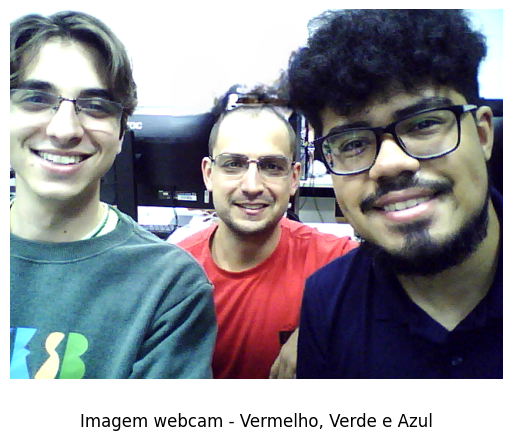

In [2]:
# Ex1:
import cv2 as cv
import matplotlib.pyplot as plt

caminho = 'img/final.png'
img = cv.imread(caminho)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Imagem webcam - Vermelho, Verde e Azul', y=-0.15, fontsize=12)
plt.show()

**Instruções:** Façam uma foto-montagem “Avatar”, juntando todos avatares numa única imagem. Meu
“Avatar” por exemplo, é o Pikachu... A ordem dos avatares deve ser a mesma da foto geral.
Podem usar qualquer editor de imagem para “Compor” as fotos individuais que cada um da
equipe vai fornecer.

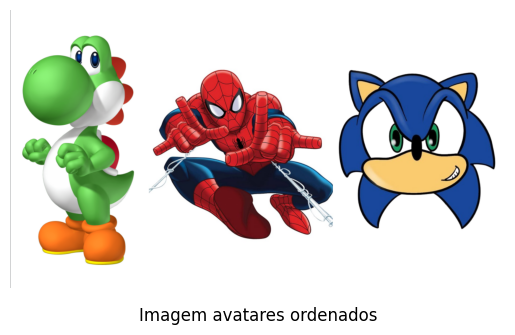

In [ ]:
# Ex2:
import cv2 as cv
import matplotlib.pyplot as plt

caminho = 'img/avatares.png'
img = cv.imread(caminho)

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Imagem avatares ordenados', y=-0.15, fontsize=12)
plt.show()

**Instruções:** Filmem com a webcam DOIS vídeos com pessoas e DOIS videos com um objeto:
i) um com mudanças lentas de movimento;
ii) e outro com mudanças rápidas de movimento.
iii) Em cada um dos vídeos os membros da equipe DEVEM ser diferentes. Podem ser apenas
dois membros, um em cada vídeo, e sugiro escolherem os que possuem as melhores
câmeras.
Apresentar os programas elaborados pela equipe para a gravação das imagens e dos vídeos .

In [ ]:
# Programa elaborado para a captura dos vídeos (adaptado do exercício 4):

import cv2 as cv
cap = cv.VideoCapture(0)

width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)

fps = 10.0 # alterar pra um valor alto pra capturar os videos rápidos

fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('videos_coletados/saida.avi', fourcc, fps, (int(width),int(height)) )

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    out.write(frame)
    cv.imshow('frame', frame)

    if cv.waitKey(1) == ord('q'):
        break

cap.release()
out.release()
cv.destroyAllWindows()

### Análise e discussão dos estudos realizados
Os estudos realizados durante este laboratório tiveram como foco a compreensão acerca de como o fluxo de captura, processamento e armazenamento de imagem e vídeo funciona em um ambiente computacional. A leitura da documentação técnica das bibliotecas utilizadas colocou-se como um ponto chave para compreender os conceitos necessários para realizar determinadas operações nos programas. Tal compreensão possibilitou a observação de que a ausência de cores na imagem exibida pelo primeiro programa ocorreu devido a passagem do valor inteiro "0" como parâmetro na função `cv.imread()`, interpretado pela biblioteca OpenCV como um comando para exibir a imagem na escala de cinza.

A utilização da webcam como meio de captura de imagem e vídeo demonstrou a relevância da captura síncrona, na qual o software precisa ser capaz de amostrar a sequência de imagens e, ao mesmo tempo, acompanhar os comandos de teclado. A implementação da função de salvamento de fotos ao pressionar a tecla 'x' demonstrou como eventos de interrupção podem ser usados para obter dados específicos sem interromper a execução do algorítmo. De maneira semelhante, para garantir que o vídeo final exibisse uma velocidade compatível com o movimento real capturado, foi necessário ajustar a taxa de quadros ao gravar arquivos no formato AVI.

Ao criar uma imagem manipulada com o avatar de cada integrante do grupo e realizar a exibição da mesma utilizando conceitos já consolidados no laboratório anterior foi possível cobrir o processo "de ponta a ponta", criando a entrada, processando a mesma e proporcionando saida dessa imagem.

Também foi possível constatar que qualquer operação de processamento digital deve ser inserida no ponto do código imediatamente após a captura do quadro e antes da exibição do mesmo. Essa lógica garante que todas as saídas reflitam as modificações aplicadas pelo programa.

### Conclusões
A resolução dos exercícios propostos neste laboratório foi essencial para consolidar conceitos que dizem respeito a captura, processamento e armazenamento de imagem e vídeo utilizando tanto elementos de software como de hardware, trabalhando em conjunto para alcançar objetivos. Além de aprender sobre funções de bibliotecas, foi possível fazer uma correlação com elementos amplamente visíveis internet afora como os *players* de vídeo ou ferramentas especializadas na exibição dos mesmos. Tais elementos são fundamentais e operam utilizando os mesmos conceitos que consolidamos resolvendo os exercícios do laboratório unidos a uma atenção rigorosa à sintonia entre o tempo de processamento do hardware e as exigências do software.

Conseguimos atingir todos os objetivos propostos, desde a captura simples até a persistência de arquivos com codecs específicos. A principal lição extraída é que a base de qualquer projeto de Processamento Digital de Imagens reside na correta configuração do ambiente de entrada e saída. Sem uma captura síncrona e bem ajustada, qualquer processamento posterior estaria comprometido.

## Referências

* MINICHINO, J.; HOWSE, J. **Learning OpenCV 3 Computer Vision with Python**. 2. ed. [S.l.]: Packt Publishing, 2015.
* OPENCV. **Flags used for image file reading and writing**. Versão 3.4.20-dev. Disponível em: https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html. Acesso em: 20 fev. 2026.
* OPENCV. **Getting Started with Images**. Disponível em: https://docs.opencv.org/4.x/db/deb/tutorial_display_image.html. Acesso em: 21 fev. 2026.
* OPENCV. **Getting Started with Videos**. Disponível em: https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html. Acesso em: 21 fev. 2026.
* OPENCV. **OpenCV-Python Tutorials**. Disponível em: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html. Acesso em: 20 fev. 2026.